# <center> **Datascience Capstone Project**

# <center> **Hospital Investment**

By Gerardo Navarro

---


### Problem Description

A Corporate group in the Health industry is studying the possibility of invest in the construction and management of five Hospitals. The Corporate wants to know where to allocate that investment, namely, in which countries, and in which cities.

In order to get solve this problem we need to collect data, choose the relevant features and made a descritive analysis that helps in the desicion making process.

###  Data Requirements

We need general information about the healthcare system of the countries, for example, population, GDP, number of hospitals, and any relevant information that helps us to make an informed decision.
It is not easy to find all the data needed in one place. Our primary sources of information will be the OCDE  and the World Health Organization (WHO). Any additional data we will retrieved from various sources, given that those datasets are inconsistent and incomplete.

There are dozens of even hundreds of variables to study the health system of a country. We are going to focus only on some relevant features to assess the suitability of a city to allocate the investment using only with data publicly available online.



### Data Collection

In [47]:
# Import Libraries
import requests 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
import folium # map rendering library
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
from pandas.io.json import json_normalize

print('Librerias importadas')

Librerias importadas


Datasets from the OCDE and the WHO, are the primary datasets with which we are going to work.


In [48]:
# Cities Population Dataset

cities_pop = pd.read_csv("/content/CITIES_population.csv")
cities_pop.head()

,METRO_ID,Metropolitan areas,VAR,Variables,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,USA116,Allen,T_T,"Population, All ages. Administrative data",2000,2000,PER,Persons,0,Units,NaN,NaN,363420.0,NaN,NaN
1,USA116,Allen,T_T,"Population, All ages. Administrative data",2001,2001,PER,Persons,0,Units,NaN,NaN,365954.0,NaN,NaN
2,USA116,Allen,T_T,"Population, All ages. Administrative data",2002,2002,PER,Persons,0,Units,NaN,NaN,368402.0,NaN,NaN
3,USA116,Allen,T_T,"Population, All ages. Administrative data",2003,2003,PER,Persons,0,Units,NaN,NaN,371190.0,NaN,NaN
4,USA116,Allen,T_T,"Population, All ages. Administrative data",2004,2004,PER,Persons,0,Units,NaN,NaN,372757.0,NaN,NaN


In [107]:
# Cities GDP

cities_gdp = pd.read_csv("/content/CITIES_GDP_percapita.csv")
cities_gdp.tail()

,METRO_ID,Metropolitan areas,VAR,Variables,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
47000,FR018,Reims,GDP_PC_REAL_PPP,"GDP per capita (USD, constant prices, constant...",2012,2012,USD,US Dollar,0,Units,NaN,NaN,36207.0,NaN,NaN
47001,FR018,Reims,GDP_PC_REAL_PPP,"GDP per capita (USD, constant prices, constant...",2013,2013,USD,US Dollar,0,Units,NaN,NaN,35963.0,NaN,NaN
47002,FR018,Reims,GDP_PC_REAL_PPP,"GDP per capita (USD, constant prices, constant...",2014,2014,USD,US Dollar,0,Units,NaN,NaN,32739.0,NaN,NaN
47003,FR018,Reims,GDP_PC_REAL_PPP,"GDP per capita (USD, constant prices, constant...",2015,2015,USD,US Dollar,0,Units,NaN,NaN,33762.0,NaN,NaN
47004,COL01,Bogota D.C.,GDP_PC_REAL_PPP,"GDP per capita (USD, constant prices, constant...",2015,2015,USD,US Dollar,0,Units,NaN,NaN,22189.0,NaN,NaN


In [50]:
# Hospitals per country

country_hospitals = pd.read_csv("/content/HEALTH_Hospitals.csv")
country_hospitals.head()

,VAR,Variable,UNIT,Measure,COU,Country,YEA,Year,Value,Flag Codes,Flags
0,HOSPTHOS,Hospitals,NOMBRENB,Number,AUS,Australia,2000,2000,1265.0,NaN,NaN
1,HOSPTHOS,Hospitals,NOMBRENB,Number,AUS,Australia,2001,2001,1283.0,NaN,NaN
2,HOSPTHOS,Hospitals,NOMBRENB,Number,AUS,Australia,2002,2002,1284.0,NaN,NaN
3,HOSPTHOS,Hospitals,NOMBRENB,Number,AUS,Australia,2003,2003,1286.0,NaN,NaN
4,HOSPTHOS,Hospitals,NOMBRENB,Number,AUS,Australia,2004,2004,1291.0,NaN,NaN


In [51]:
country_bed_density = pd.read_csv("/content/WHS6_102_Hospital bed density.csv")
country_bed_density.head()

,Country,Year,Hospital beds (per 10 000 population)
0,Afghanistan,2015,5
1,Afghanistan,2014,5
2,Afghanistan,2013,5
3,Afghanistan,2012,5
4,Afghanistan,2011,4


In [52]:
# Access to Healthcare per country

country_healthcare_access = pd.read_csv("/content/HEALTH_Protection_total.csv")
country_healthcare_access.head()

,VAR,Variable,UNIT,Measure,COU,Country,YEA,Year,Value,Flag Codes,Flags
0,TPRIBASI,Total public and primary private health insurance,COVPOPTX,% of total population covered,AUS,Australia,2000,2000,100.0,E,Estimated value
1,TPRIBASI,Total public and primary private health insurance,COVPOPTX,% of total population covered,AUS,Australia,2001,2001,100.0,E,Estimated value
2,TPRIBASI,Total public and primary private health insurance,COVPOPTX,% of total population covered,AUS,Australia,2002,2002,100.0,E,Estimated value
3,TPRIBASI,Total public and primary private health insurance,COVPOPTX,% of total population covered,AUS,Australia,2003,2003,100.0,E,Estimated value
4,TPRIBASI,Total public and primary private health insurance,COVPOPTX,% of total population covered,AUS,Australia,2004,2004,100.0,E,Estimated value


### Data Understanding

First, we are going to take a look at all the variables of the dataset.

In [53]:
print('--Variables of the population dataset: \n ' ,cities_pop.Variables.unique())
print('--Variables of the GDP dataset: \n ' ,cities_gdp.Variables.unique())
print('--Variables of the Hospitals dataset: \n ' ,country_hospitals.Variable.unique())
print('--Variables of the Healthcare access dataset: \n ' ,country_healthcare_access.Variable.unique())

--Variables of the population dataset: 
  ['  Population, All ages. Administrative data'
 'Share of population  in metropolitan area over the national value'
 'Population density (pop. per km2)']
--Variables of the GDP dataset: 
  ['GDP (Millions USD, constant prices, constant PPP, base year 2010)'
 '      Share GDP per capita in Metropolitan area over the national value'
 '      Share of GDP in Metropolitan area over the national value'
 'GDP per capita (USD, constant prices, constant PPP, base year 2010)'
 'Labour productivity (GDP per worker in USD, constant prices, constant PPP, base year 2010)'
 'Regional Employment at place of work']
--Variables of the Hospitals dataset: 
  ['Hospitals' 'General hospitals' 'Publicly owned hospitals'
 'Not-for-profit privately owned hospitals'
 'For-profit privately owned hospitals']
--Variables of the Healthcare access dataset: 
  ['Total public and primary private health insurance']


In [54]:
print('--Years in the population data set: \n' ,cities_pop.Year.unique())
print('--Years in the GDP data set: \n' ,cities_gdp.Year.unique())
print('--Years in the hospitals data set: \n' ,country_hospitals.Year.unique())
print('--Years in the healthcare access data set: \n' ,country_healthcare_access.Year.unique())
print('--Years in the bed density data set: \n' ,country_bed_density.Year.unique())

--Years in the population data set: 
 [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016]
--Years in the GDP data set: 
 [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]
--Years in the hospitals data set: 
 [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018]
--Years in the healthcare access data set: 
 [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018]
--Years in the bed density data set: 
 [2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000]


The variables we are going to need for the analysis are:
- Cities population dataset: Population, Population density
- Cities GDP: GDP per capita
- Country Hospitals: Hospitals (total number of hospitals)
- Country Healthcare access: Total public and primary private health insurance

Also, we can observe that we have data from several years, so we are going to use data from 2016 because it is the most up to date information in all datasets.

### <span style="color:red"> Data Preparation </span>


We will build two datasets with information about the Countries, and the other with details of the Cities. The primary feature will be the population to decide which cities we will study. With that, we will choose the 20 most populated cities of countries members of the OCDE.

One feature that is difficult to obtain is the number of hospitals in each city, the OCDE and the WHO datasets does not provide this information. In this case, we are going to use the Foursquare API to obtain the number of hospitals given the geolocalization coordinates and a radius of search.

Once we collected and prepared the data, we are going to use clustering to determine if there is a cluster of cities more suitable for the allocation of the investment.

First, we need to filter the data by city, using the population as a feature.


In [55]:
cities_pop.head()

,METRO_ID,Metropolitan areas,VAR,Variables,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,USA116,Allen,T_T,"Population, All ages. Administrative data",2000,2000,PER,Persons,0,Units,NaN,NaN,363420.0,NaN,NaN
1,USA116,Allen,T_T,"Population, All ages. Administrative data",2001,2001,PER,Persons,0,Units,NaN,NaN,365954.0,NaN,NaN
2,USA116,Allen,T_T,"Population, All ages. Administrative data",2002,2002,PER,Persons,0,Units,NaN,NaN,368402.0,NaN,NaN
3,USA116,Allen,T_T,"Population, All ages. Administrative data",2003,2003,PER,Persons,0,Units,NaN,NaN,371190.0,NaN,NaN
4,USA116,Allen,T_T,"Population, All ages. Administrative data",2004,2004,PER,Persons,0,Units,NaN,NaN,372757.0,NaN,NaN


In [56]:
# Select the Variables needed from the dataset
cities_pop = pd.read_csv("/content/CITIES_population.csv")
cities_pop_a = cities_pop[["METRO_ID","Variables", "Metropolitan areas","Year", "Value"]]
cities_pop_a = cities_pop_a.where(cities_pop_a["Variables"] == '  Population, All ages. Administrative data').dropna() 
cities_pop_a.rename(columns={'Value': 'Population', 'Metropolitan areas': 'Cities', 'METRO_ID':'Country'}, inplace = True)
cities_pop_a.drop(["Variables"], axis=1, inplace=True)

cities_pop_b = cities_pop[["METRO_ID","Variables", "Metropolitan areas","Year", "Value"]]
cities_pop_b = cities_pop_b.where(cities_pop_b["Variables"] == 'Population density (pop. per km2)').dropna() 
cities_pop_b.rename(columns={'Value': 'Population density (pop. per km2)', 'Metropolitan areas': 'Cities', 'METRO_ID':'Country'}, inplace = True)
cities_pop_b.drop(["Variables"], axis=1, inplace=True)

cities_pop = pd.merge(cities_pop_a,cities_pop_b)

cities_pop.head()


,Country,Cities,Year,Population,Population density (pop. per km2)
0,USA116,Allen,2000.0,363420.0,140.5
1,USA116,Allen,2001.0,365954.0,141.5
2,USA116,Allen,2002.0,368402.0,142.4
3,USA116,Allen,2003.0,371190.0,143.5
4,USA116,Allen,2004.0,372757.0,144.1


For some cities, for example, Tokyo, there is no information regarding 2016; this is also true for various cities. Then we are going to restring the information to data from 2015. 

In [57]:
# Selecting only data from 2015 and sort by population
cities_pop = cities_pop.where(cities_pop["Year"] == 2015).dropna() 
cities_pop.reset_index(drop=True, inplace=True)
cities_pop.head()

,Country,Cities,Year,Population,Population density (pop. per km2)
0,USA116,Allen,2015.0,401074.0,155.0
1,FR215,Rouen,2015.0,693774.0,241.9
2,MEX20,Hermosillo,2015.0,899048.0,52.8
3,FR038,Le Mans,2015.0,357743.0,159.7
4,USA11,Boston,2015.0,4347346.0,652.3


In [58]:
# Retrieving GDP from GDP dataset and mergin it with population dataset
cities_gdp = pd.read_csv("/content/CITIES_GDP_percapita.csv")
cities_gdp = cities_gdp[["METRO_ID", "Variables", "Metropolitan areas","Year", "Value"]]
cities_gdp = cities_gdp.where(cities_gdp["Year"] == 2015).dropna() 
cities_gdp = cities_gdp.where(cities_gdp["Variables"] == 'GDP per capita (USD, constant prices, constant PPP, base year 2010)').dropna() 
cities_gdp.rename(columns={'Value': 'GDP per capita (USD)', 'Metropolitan areas': 'Cities', 'METRO_ID':'Country'}, inplace = True)
cities_gdp.drop(["Variables"], axis=1, inplace=True)

# Merging population dataset and GDP dataset

cities_A = pd.merge(cities_pop,cities_gdp)
cities_A.sort_values(by="Population", ascending=False, inplace=True)
cities = cities_A[0:20]
cities.reset_index(drop=True, inplace=True)

# Change country ID per country name, and change other values
cities.loc[[0,5,11], "Country"] = 'Japan'
cities.loc[1, "Country"] = 'Korea'
cities.loc[2, "Country"] = 'Mexico'
cities.loc[[3,4,8,10,12,15,16,18,19], "Country"] = 'United States'
cities.loc[6, "Country"] = 'France'
cities.loc[7, "Country"] = 'United Kingdom'
cities.loc[9, "Country"] = 'Colombia'
cities.loc[13, "Country"] = 'Chile'
cities.loc[14, "Country"] = 'Canada'
cities.loc[17, "Country"] = 'Spain'
cities.loc[3, 'Cities'] = 'New York'
cities.loc[4, 'Cities'] = 'Los Angeles'
cities.loc[5, 'Cities'] = 'Osaka'
cities.loc[9, 'Cities'] = 'Bogota'
cities.loc[10, 'Cities'] = 'Washington'
cities.loc[16, 'Cities'] = 'San Francisco'
cities.loc[18, 'Cities'] = 'Philadelphia'
cities.loc[19, 'Cities'] = 'Miami'

cities.head(20)


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Country,Cities,Year,Population,Population density (pop. per km2),GDP per capita (USD)
0,Japan,Tokyo,2015.0,35385804.0,3123.4,43664.0
1,Korea,Seoul,2015.0,23949882.0,3579.3,34343.0
2,Mexico,Mexico City,2015.0,20553996.0,4455.5,22587.0
3,United States,New York,2015.0,20194502.0,845.7,74244.0
4,United States,Los Angeles,2015.0,17756698.0,211.7,57577.0
5,Japan,Osaka,2015.0,16827420.0,1914.3,41660.0
6,France,Paris,2015.0,12006868.0,994.0,61883.0
7,United Kingdom,London,2015.0,11853946.0,1830.9,58827.0
8,United States,Chicago,2015.0,9557503.0,504.8,61519.0
9,Colombia,Bogota,2015.0,8952756.0,3377.2,22189.0


 Now we have the 20 most populated cities in our datasets. One features missing is the number of hospitals in each city. Using the **Foursquare API**, we are going to retrieve this feature.

In [59]:
# Obtaining coordinates of each city

column_names =['Cities', 'Latitude', 'Longitude']
cities_coor = pd.DataFrame(columns=column_names)
city = cities['Cities']

for city in city:
    address = city
    geolocator = Nominatim(user_agent="explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    cities_coor = cities_coor.append({'Cities': address,
                                          'Latitude': latitude,
                                          'Longitude': longitude}, ignore_index=True)
    #print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))
cities = pd.merge(cities,cities_coor)
cities

,Country,Cities,Year,Population,Population density (pop. per km2),GDP per capita (USD),Latitude,Longitude
0,Japan,Tokyo,2015.0,35385804.0,3123.4,43664.0,35.682839,139.759455
1,Korea,Seoul,2015.0,23949882.0,3579.3,34343.0,37.566679,126.978291
2,Mexico,Mexico City,2015.0,20553996.0,4455.5,22587.0,19.432630,-99.133178
3,United States,New York,2015.0,20194502.0,845.7,74244.0,40.712728,-74.006015
4,United States,Los Angeles,2015.0,17756698.0,211.7,57577.0,34.053691,-118.242767
5,Japan,Osaka,2015.0,16827420.0,1914.3,41660.0,34.619881,135.490357
6,France,Paris,2015.0,12006868.0,994.0,61883.0,48.856697,2.351462
7,United Kingdom,London,2015.0,11853946.0,1830.9,58827.0,51.507322,-0.127647
8,United States,Chicago,2015.0,9557503.0,504.8,61519.0,41.875562,-87.624421
9,Colombia,Bogota,2015.0,8952756.0,3377.2,22189.0,4.598080,-74.076044


In [60]:
cities.loc[13, 'Longitude'] = -70.673676
cities.loc[13, 'Latitude'] = -33.447487
cities

,Country,Cities,Year,Population,Population density (pop. per km2),GDP per capita (USD),Latitude,Longitude
0,Japan,Tokyo,2015.0,35385804.0,3123.4,43664.0,35.682839,139.759455
1,Korea,Seoul,2015.0,23949882.0,3579.3,34343.0,37.566679,126.978291
2,Mexico,Mexico City,2015.0,20553996.0,4455.5,22587.0,19.432630,-99.133178
3,United States,New York,2015.0,20194502.0,845.7,74244.0,40.712728,-74.006015
4,United States,Los Angeles,2015.0,17756698.0,211.7,57577.0,34.053691,-118.242767
5,Japan,Osaka,2015.0,16827420.0,1914.3,41660.0,34.619881,135.490357
6,France,Paris,2015.0,12006868.0,994.0,61883.0,48.856697,2.351462
7,United Kingdom,London,2015.0,11853946.0,1830.9,58827.0,51.507322,-0.127647
8,United States,Chicago,2015.0,9557503.0,504.8,61519.0,41.875562,-87.624421
9,Colombia,Bogota,2015.0,8952756.0,3377.2,22189.0,4.598080,-74.076044


In [61]:
# define the world map



world_map = folium.Map(location=[0, 0],zoom_start=2.4)

for lat, lng, label in zip(cities['Latitude'], cities['Longitude'], cities['Cities']):
    label = '{}'.format(label)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(world_map)  
    

# display world map
world_map

In [62]:
# Using Foursquare to retrive the number of Hospitals of each city

CLIENT_ID = 'XXXXXXX' # your Foursquare ID
CLIENT_SECRET = 'XXXXXXXX' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 200

search_query = 'Hospital'
radius = 100000

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

index=0
for city in cities.Cities:
  latitude = cities.Latitude[index]
  longitude = cities.Longitude[index]
  url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
  res = requests.get(url).json()
  venues = res['response']['venues']
  dataframe = json_normalize(venues)
  dataframe = pd.DataFrame(venues)
  index += 1
  print('Number of Hospitals in {} is {} .'.format(city, dataframe.shape[0]))


Number of Hospitals in Tokyo is 50 .
Number of Hospitals in Seoul is 50 .
Number of Hospitals in Mexico City is 50 .
Number of Hospitals in New York is 50 .
Number of Hospitals in Los Angeles is 50 .
Number of Hospitals in Osaka is 50 .
Number of Hospitals in Paris is 50 .
Number of Hospitals in London is 50 .
Number of Hospitals in Chicago  is 50 .
Number of Hospitals in Bogota is 50 .
Number of Hospitals in Washington is 50 .
Number of Hospitals in Toyota is 50 .
Number of Hospitals in Dallas is 50 .
Number of Hospitals in Santiago is 50 .
Number of Hospitals in Toronto is 50 .
Number of Hospitals in Houston is 50 .
Number of Hospitals in San Francisco is 50 .
Number of Hospitals in Madrid is 50 .
Number of Hospitals in Philadelphia is 50 .
Number of Hospitals in Miami is 50 .


Example of the search query

In [63]:
print(dataframe.shape)
dataframe.head()

(50, 8)


,id,name,location,categories,venuePage,referralId,hasPerk,delivery
0,513f3fe7e4b0e4e605cc88a7,Brickell Bay Animal Hospital,"{'address': '940 Brickell Bay Dr', 'lat': 25.7...","[{'id': '4d954af4a243a5684765b473', 'name': 'V...",{'id': '85374244'},v-1583760178,False,NaN
1,4b491deff964a520936626e3,Jackson Memorial Hospital,"{'address': '1611 NW 12th Ave', 'lat': 25.7908...","[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",NaN,v-1583760178,False,"{'id': '1186753', 'url': 'https://www.grubhub...."
2,4bfe6228e529c9282d38bc8c,Miami VA Hospital,"{'address': '1201 NW 16th St', 'crossStreet': ...","[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",NaN,v-1583760178,False,NaN
3,4ba221b7f964a520f8dd37e3,University Of Miami Hospital,"{'address': '1400 NW 12th Ave #2002', 'lat': 2...","[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",NaN,v-1583760178,False,NaN
4,4b314f60f964a520710425e3,Mercy Hospital,"{'address': '3663 S Miami Ave', 'lat': 25.7406...","[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",NaN,v-1583760178,False,NaN


The maximum radius of search in the Foursquare API is 100km, but it appears that it only gives us 50 venues per search. Even if we change the radius up to 20Km, the number of venues in the response in the same, and for less of 20km, we received less than 50 venues. So we need to get this information from other sources.

We are going to use the data from http://www.city-data.com/world-cities/index.html.

In [64]:
# Number of Hospital per City

list = [650,79,66,130,144,42,39,134,84,22,42,11,37,36,50,51,23,56,100,28]
cities['Hospitals/City'] = np.array(list)

cities.head(20)



,Country,Cities,Year,Population,Population density (pop. per km2),GDP per capita (USD),Latitude,Longitude,Hospitals/City
0,Japan,Tokyo,2015.0,35385804.0,3123.4,43664.0,35.682839,139.759455,650
1,Korea,Seoul,2015.0,23949882.0,3579.3,34343.0,37.566679,126.978291,79
2,Mexico,Mexico City,2015.0,20553996.0,4455.5,22587.0,19.432630,-99.133178,66
3,United States,New York,2015.0,20194502.0,845.7,74244.0,40.712728,-74.006015,130
4,United States,Los Angeles,2015.0,17756698.0,211.7,57577.0,34.053691,-118.242767,144
5,Japan,Osaka,2015.0,16827420.0,1914.3,41660.0,34.619881,135.490357,42
6,France,Paris,2015.0,12006868.0,994.0,61883.0,48.856697,2.351462,39
7,United Kingdom,London,2015.0,11853946.0,1830.9,58827.0,51.507322,-0.127647,134
8,United States,Chicago,2015.0,9557503.0,504.8,61519.0,41.875562,-87.624421,84
9,Colombia,Bogota,2015.0,8952756.0,3377.2,22189.0,4.598080,-74.076044,22


Now from the WHO datasets, we need to retrieve the number of hospitals per country, the number of beds density, and the percentage of the population that have access to healthcare services.

In [65]:
# Number of hospitals per Country

d = pd.read_csv("/content/HEALTH_Hospitals.csv")
d1 = d[["Country", "Variable", "Year","Value"]]
hospitals_country = d1.where(d1["Year"] == 2015).dropna() 
hospitals_country = hospitals_country.where(d1["Variable"] == 'Hospitals').dropna() 
hospitals_country.sort_values(by="Value", ascending=False, inplace=True)
hospitals_country.rename(columns={'Value': 'Hospitals/Country'}, inplace = True)
hospitals_country.drop(["Variable"], axis=1, inplace=True)
indexNames = hospitals_country[(hospitals_country['Hospitals/Country'] < 100)].index
hospitals_country.drop(indexNames, inplace = True)
hospitals_country = hospitals_country[hospitals_country['Country'].isin(cities['Country'])]

hospitals_country.head(20)


,Country,Year,Hospitals/Country
934,Japan,2015.0,8480.0
1724,United States,2015.0,5564.0
1112,Mexico,2015.0,4456.0
988,Korea,2015.0,3678.0
442,France,2015.0,3089.0
1698,United Kingdom,2015.0,1882.0
1486,Spain,2015.0,765.0
263,Canada,2015.0,719.0
1791,Chile,2015.0,363.0


In [66]:
# Bed density

d = pd.read_csv("/content/WHS6_102_Hospital bed density.csv")
print(d.shape)
print(d.nunique())
print(d.Year.unique())
country_bed_density = d.where(d["Year"] == 2015).dropna() 
country_bed_density = country_bed_density[country_bed_density['Country'].isin(cities['Country'])]

country_bed_density.head(20)


(1342, 3)
Country                                  190
Year                                      16
Hospital beds (per 10 000 population)    226
dtype: int64
[2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000]


,Country,Year,Hospital beds (per 10 000 population)
772,Mexico,2015.0,15


In [67]:
# Population access to Healthcare services

d = pd.read_csv("/content/HEALTH_Protection_total.csv")
print(d.shape)
print(d.nunique())
d = d.where(d["Year"] == 2015).dropna() 
d.head(20)

(614, 11)
VAR             1
Variable        1
UNIT            1
Measure         1
COU            37
Country        37
YEA            19
Year           19
Value         117
Flag Codes      3
Flags           3
dtype: int64


,VAR,Variable,UNIT,Measure,COU,Country,YEA,Year,Value,Flag Codes,Flags
15,TPRIBASI,Total public and primary private health insurance,COVPOPTX,% of total population covered,AUS,Australia,2015.0,2015.0,100.0,E,Estimated value
89,TPRIBASI,Total public and primary private health insurance,COVPOPTX,% of total population covered,CZE,Czech Republic,2015.0,2015.0,100.0,E,Estimated value
194,TPRIBASI,Total public and primary private health insurance,COVPOPTX,% of total population covered,HUN,Hungary,2015.0,2015.0,95.0,E,Estimated value
319,TPRIBASI,Total public and primary private health insurance,COVPOPTX,% of total population covered,NLD,Netherlands,2015.0,2015.0,99.8,E,Estimated value


The previous datasets are incomplete, do not have information from the year 2015 nor of the countries needed.

The missing information we are going to  retrieved from:
https://www.indexmundi.com/

In [68]:
# Missing data from datasets

h1 = pd.DataFrame({'Country':['Colombia'], 'Year': 2015.0, 'Hospitals/Country' : [340] })
hospitals_country = hospitals_country.append(h1, ignore_index=True)

beds = [13.4, 2.9, 1.5, 11.5, 6.5, 2.8, 3, 2.7, 2.2, 1.5]
ac = [99.895, 99.97, 91.183, 100, 98.65, 99.11, 99.904, 99.286, 100, 89.625]
hospitals_country['Hospital beds(per 1000 population)'] = np.array(beds)
hospitals_country['Access to Healthcare(% population)'] = np.array(ac)

hospitals_country

,Country,Year,Hospitals/Country,Hospital beds(per 1000 population),Access to Healthcare(% population)
0,Japan,2015.0,8480.0,13.4,99.895
1,United States,2015.0,5564.0,2.9,99.970
2,Mexico,2015.0,4456.0,1.5,91.183
3,Korea,2015.0,3678.0,11.5,100.000
4,France,2015.0,3089.0,6.5,98.650
5,United Kingdom,2015.0,1882.0,2.8,99.110
6,Spain,2015.0,765.0,3.0,99.904
7,Canada,2015.0,719.0,2.7,99.286
8,Chile,2015.0,363.0,2.2,100.000
9,Colombia,2015.0,340.0,1.5,89.625


In [69]:
# Final Dataset

data = pd.merge(cities, hospitals_country)
data.columns
data = data[['Country','Hospitals/Country','Hospital beds(per 1000 population)','Access to Healthcare(% population)', 'Year', 'Cities', 'Population', 'Population density (pop. per km2)','GDP per capita (USD)', 'Hospitals/City']]
data = data.sort_values(by='Population', ascending=False)
data['Hospitals/Country'] = data['Hospitals/Country'].astype('int')
data['Year'] = data['Year'].astype('int')
data['Population'] = data['Population'].astype('int')
data['GDP per capita (USD)'] = data['GDP per capita (USD)'].astype('int')
data

,Country,Hospitals/Country,Hospital beds(per 1000 population),Access to Healthcare(% population),Year,Cities,Population,Population density (pop. per km2),GDP per capita (USD),Hospitals/City
0,Japan,8480,13.4,99.895,2015,Tokyo,35385804,3123.4,43664,650
3,Korea,3678,11.5,100.000,2015,Seoul,23949882,3579.3,34343,79
4,Mexico,4456,1.5,91.183,2015,Mexico City,20553996,4455.5,22587,66
5,United States,5564,2.9,99.970,2015,New York,20194502,845.7,74244,130
6,United States,5564,2.9,99.970,2015,Los Angeles,17756698,211.7,57577,144
1,Japan,8480,13.4,99.895,2015,Osaka,16827420,1914.3,41660,42
14,France,3089,6.5,98.650,2015,Paris,12006868,994.0,61883,39
15,United Kingdom,1882,2.8,99.110,2015,London,11853946,1830.9,58827,134
7,United States,5564,2.9,99.970,2015,Chicago,9557503,504.8,61519,84
16,Colombia,340,1.5,89.625,2015,Bogota,8952756,3377.2,22189,22


In [70]:
data.dtypes

Country                                object
Hospitals/Country                       int64
Hospital beds(per 1000 population)    float64
Access to Healthcare(% population)    float64
Year                                    int64
Cities                                 object
Population                              int64
Population density (pop. per km2)     float64
GDP per capita (USD)                    int64
Hospitals/City                          int64
dtype: object

The final dataset is finished, the features are more general regarding the country and cities, specific data of the healthcare system of each city is more difficult to obtain, you have to search this data in the local institutions.

In this exercise, we are going to treated as a first approximation for solving the problem, determine which five cities are the best to build a hospital according to the selected features.

Once we selected those cities, we can pass to a more specific and local analysis of the healthcare system of each city and iterate the methodology from there.

### Exploratory Analysis

In [71]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.3


In [72]:
data.describe()

,Hospitals/Country,Hospital beds(per 1000 population),Access to Healthcare(% population),Year,Population,Population density (pop. per km2),GDP per capita (USD),Hospitals/City
count,20.000000,20.000000,20.00000,20.0,2.000000e+01,20.000000,20.000000,20.000000
mean,4540.400000,4.900000,98.85865,2015.0,1.241613e+07,1301.600000,51722.650000,91.200000
std,2614.397795,4.243509,2.92450,0.0,7.756213e+06,1305.083974,18922.830973,137.125605
min,340.000000,1.500000,89.62500,2015.0,6.181765e+06,206.700000,21803.000000,11.000000
25%,2787.250000,2.875000,99.74275,2015.0,6.801652e+06,419.775000,41792.750000,36.750000
50%,5564.000000,2.900000,99.97000,2015.0,8.950706e+06,730.500000,52584.500000,50.500000
75%,5564.000000,3.875000,99.97000,2015.0,1.705974e+07,1851.750000,62720.250000,88.000000
max,8480.000000,13.400000,100.00000,2015.0,3.538580e+07,4455.500000,94699.000000,650.000000


Here we can observe the distribution of the data, the standard deviation is wide, except for the "Access to Healthcare" attribute. This first analysis does not give any preliminary insight. 

We can say that in order to decide on where to build a hospital, first, we need to know in which cities are deficits of hospitals given his population and if the population that is able to pay for private healthcare services.



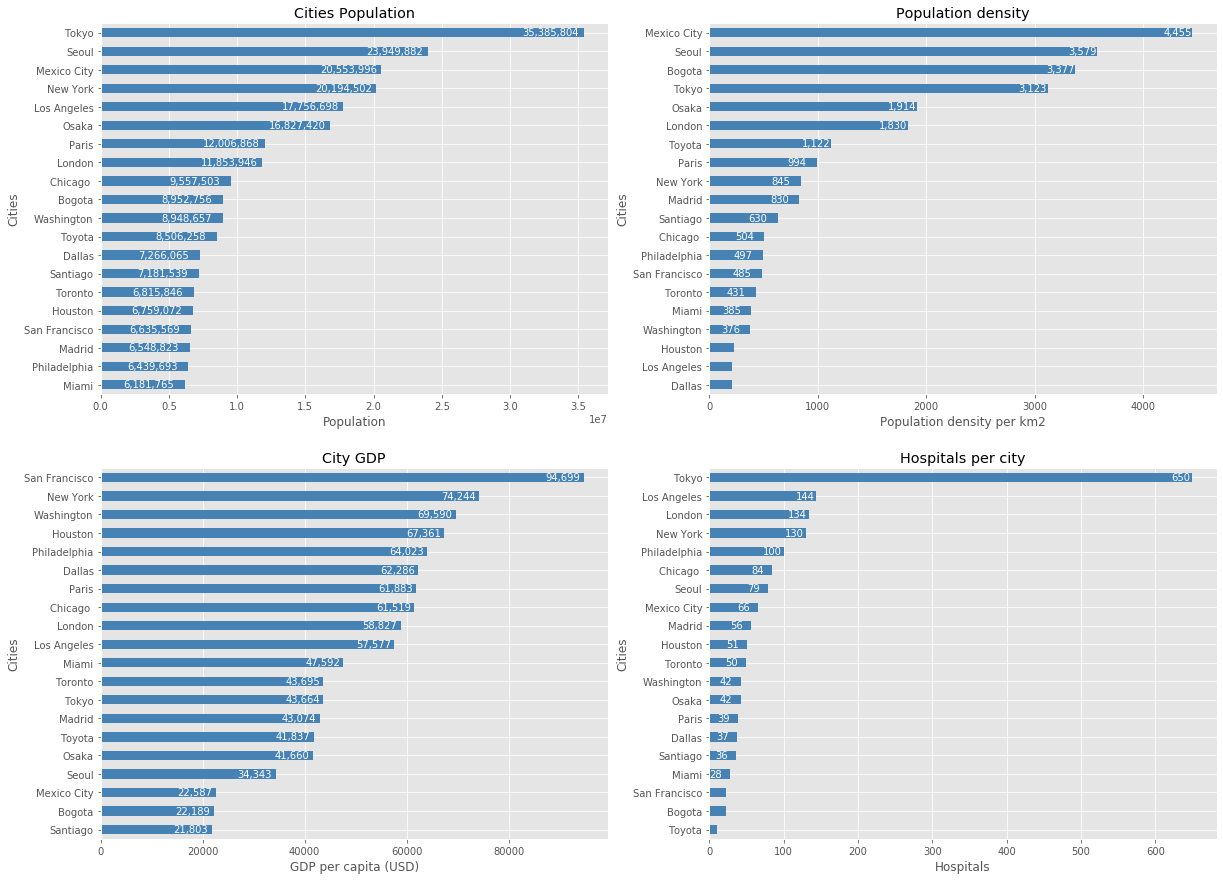

In [111]:
# Plots city features

fig = plt.figure()

plt.subplot(2, 2, 1)
df = data.set_index('Cities')
df1 = df['Population']
df1 = df1.sort_values(ascending=True)
df1.plot(kind='barh', figsize=(20, 15), color='steelblue')
plt.xlabel('Population')
plt.title('Cities Population')

# annotate value labels to each country
for index, value in enumerate(df1): 
    label = format(int(value), ',') # format int with commas
    
    #place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 4500000, index - 0.15), color='white')

plt.subplot(2, 2, 2)
df1 = df['Population density (pop. per km2)']
df1 = df1.sort_values(ascending=True)
df1.plot(kind='barh', figsize=(20, 15), color='steelblue')
plt.xlabel('Population density per km2')
plt.title('Population density')

# annotate value labels to each country
for index, value in enumerate(df1): 
    label = format(int(value), ',') # format int with commas
    
    #place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 270, index - 0.15), color='white')


plt.subplot(2, 2, 3)
df1 = df['GDP per capita (USD)']
df1 = df1.sort_values(ascending=True)
df1.plot(kind='barh', figsize=(20, 15), color='steelblue')
plt.xlabel('GDP per capita (USD)')
plt.title('City GDP')

# annotate value labels to each country
for index, value in enumerate(df1): 
    label = format(int(value), ',') # format int with commas
    
    #place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 7500, index - 0.15), color='white')

plt.subplot(2, 2, 4)
df1 = df['Hospitals/City']
df1 = df1.sort_values(ascending=True)
df1.plot(kind='barh', figsize=(20, 15), color='steelblue')
plt.xlabel('Hospitals')
plt.title('Hospitals per city')

# annotate value labels to each country
for index, value in enumerate(df1): 
    label = format(int(value), ',') # format int with commas
    
    #place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 28, index - 0.15), color='white')
fig.savefig('1.png', dpi = 100)
plt.show()

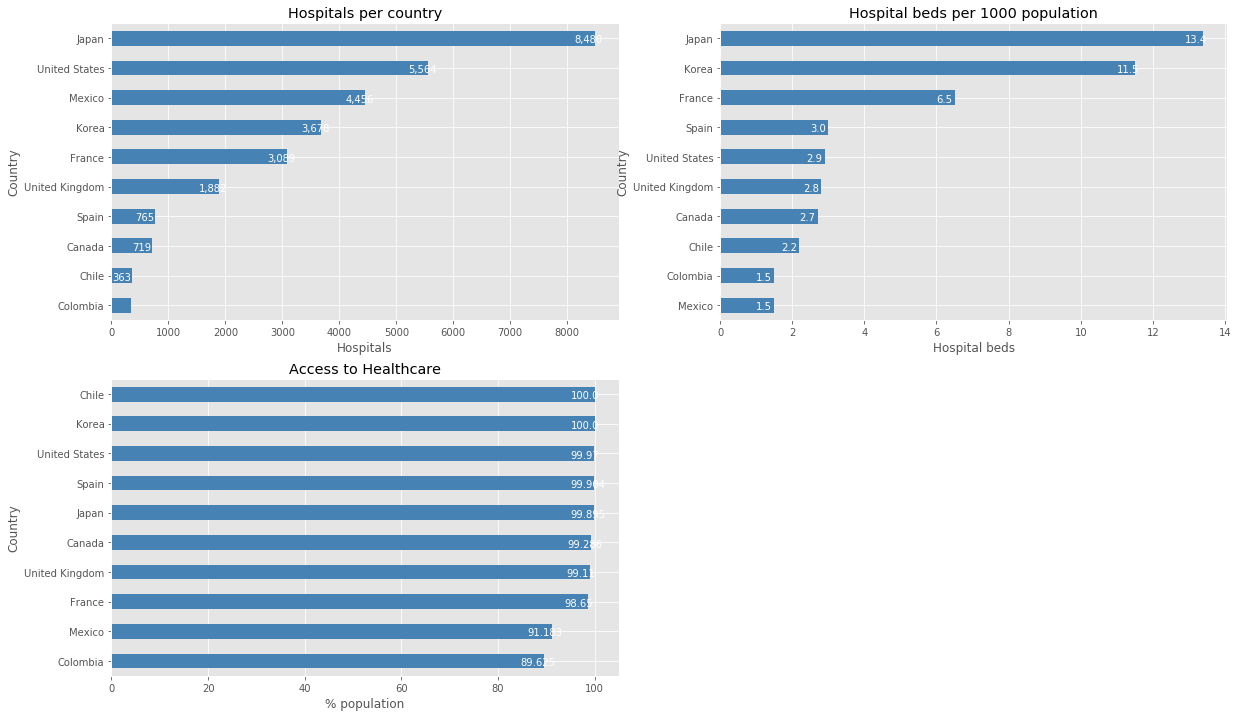

In [110]:
# Plots country features
%matplotlib inline

fig = plt.figure()

plt.subplot(2, 2, 1)
df = hospitals_country.set_index('Country')
df1 = df['Hospitals/Country']

df1 = df1.sort_values(ascending=True)
df1.plot(kind='barh', figsize=(20, 12), color='steelblue')
plt.xlabel('Hospitals')
plt.title('Hospitals per country')

# annotate value labels to each country
for index, value in enumerate(df1): 
    label = format(int(value), ',') # format int with commas
    
    #place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 350, index - 0.15), color='white')

plt.subplot(2, 2, 2)
df1 = df['Hospital beds(per 1000 population)']
df1 = df1.sort_values(ascending=True)
df1.plot(kind='barh', figsize=(20, 12), color='steelblue')
plt.xlabel('Hospital beds')
plt.title('Hospital beds per 1000 population')

# annotate value labels to each country
for index, value in enumerate(df1): 
    label = format(value) # format int with commas
    
    #place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0.5, index - 0.15), color='white')


plt.subplot(2, 2, 3)
df1 = df['Access to Healthcare(% population)']
df1 = df1.sort_values(ascending=True)
df1.plot(kind='barh', figsize=(20, 12), color='steelblue')
plt.xlabel('% population')
plt.title('Access to Healthcare')

# annotate value labels to each country
for index, value in enumerate(df1): 
    label = format(value) # format int with commas
    
    #place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 5, index - 0.15), color='white')

#fig.subplots_adjust(left=None, bottom=2, right=None, top=3, wspace=None, hspace=None)

fig.savefig('2.png', dpi =100)

plt.show()




It appears that these features tell us more about the quality of life in a city, but do not tell us much about the local healthcare system.

We are going to do a segmentation analysis using K-Means to see the similarity between cities.

### Segmentation

In [75]:
data

,Country,Hospitals/Country,Hospital beds(per 1000 population),Access to Healthcare(% population),Year,Cities,Population,Population density (pop. per km2),GDP per capita (USD),Hospitals/City
0,Japan,8480,13.4,99.895,2015,Tokyo,35385804,3123.4,43664,650
3,Korea,3678,11.5,100.000,2015,Seoul,23949882,3579.3,34343,79
4,Mexico,4456,1.5,91.183,2015,Mexico City,20553996,4455.5,22587,66
5,United States,5564,2.9,99.970,2015,New York,20194502,845.7,74244,130
6,United States,5564,2.9,99.970,2015,Los Angeles,17756698,211.7,57577,144
1,Japan,8480,13.4,99.895,2015,Osaka,16827420,1914.3,41660,42
14,France,3089,6.5,98.650,2015,Paris,12006868,994.0,61883,39
15,United Kingdom,1882,2.8,99.110,2015,London,11853946,1830.9,58827,134
7,United States,5564,2.9,99.970,2015,Chicago,9557503,504.8,61519,84
16,Colombia,340,1.5,89.625,2015,Bogota,8952756,3377.2,22189,22


####  K-Means Clustering

In [76]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

# Selecting features

X = data[['Hospitals/Country','Hospital beds(per 1000 population)','Access to Healthcare(% population)', 'Population', 'Population density (pop. per km2)','GDP per capita (USD)', 'Hospitals/City']].values
X

array([[8.4800000e+03, 1.3400000e+01, 9.9895000e+01, 3.5385804e+07,
        3.1234000e+03, 4.3664000e+04, 6.5000000e+02],
       [3.6780000e+03, 1.1500000e+01, 1.0000000e+02, 2.3949882e+07,
        3.5793000e+03, 3.4343000e+04, 7.9000000e+01],
       [4.4560000e+03, 1.5000000e+00, 9.1183000e+01, 2.0553996e+07,
        4.4555000e+03, 2.2587000e+04, 6.6000000e+01],
       [5.5640000e+03, 2.9000000e+00, 9.9970000e+01, 2.0194502e+07,
        8.4570000e+02, 7.4244000e+04, 1.3000000e+02],
       [5.5640000e+03, 2.9000000e+00, 9.9970000e+01, 1.7756698e+07,
        2.1170000e+02, 5.7577000e+04, 1.4400000e+02],
       [8.4800000e+03, 1.3400000e+01, 9.9895000e+01, 1.6827420e+07,
        1.9143000e+03, 4.1660000e+04, 4.2000000e+01],
       [3.0890000e+03, 6.5000000e+00, 9.8650000e+01, 1.2006868e+07,
        9.9400000e+02, 6.1883000e+04, 3.9000000e+01],
       [1.8820000e+03, 2.8000000e+00, 9.9110000e+01, 1.1853946e+07,
        1.8309000e+03, 5.8827000e+04, 1.3400000e+02],
       [5.5640000e+03, 2

In [77]:
# Normalizing
X = data[['Hospitals/Country','Hospital beds(per 1000 population)','Access to Healthcare(% population)', 'Population', 'Population density (pop. per km2)','GDP per capita (USD)', 'Hospitals/City']].values
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet[0:5]

array([[ 1.54603264,  2.05509545,  0.36357417,  3.03838797,  1.43218934,
        -0.43693253,  4.18096024],
       [-0.338435  ,  1.59572117,  0.40041046,  1.52566417,  1.79059044,
        -0.94230851, -0.09128081],
       [-0.03312142, -0.82203818, -2.69278535,  1.0764623 ,  2.47940607,
        -1.57970793, -0.18854724],
       [ 0.40169535, -0.48355187,  0.38988581,  1.02890906, -0.3584011 ,
         1.22108672,  0.29030289],
       [ 0.40169535, -0.48355187,  0.38988581,  0.7064406 , -0.85681368,
         0.31741743,  0.39505136]])

In [78]:
# K-means

clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(Clus_dataSet)
labels = k_means.labels_
print(labels)

[0 0 2 1 1 0 1 1 1 2 1 0 1 1 1 1 1 1 1 1]


In [79]:
data['Cluster'] = labels
data.sort_values(by='Cluster')

,Country,Hospitals/Country,Hospital beds(per 1000 population),Access to Healthcare(% population),Year,Cities,Population,Population density (pop. per km2),GDP per capita (USD),Hospitals/City,Cluster
0,Japan,8480,13.4,99.895,2015,Tokyo,35385804,3123.4,43664,650,0
3,Korea,3678,11.5,100.000,2015,Seoul,23949882,3579.3,34343,79,0
1,Japan,8480,13.4,99.895,2015,Osaka,16827420,1914.3,41660,42,0
2,Japan,8480,13.4,99.895,2015,Toyota,8506258,1122.2,41837,11,0
19,Spain,765,3.0,99.904,2015,Madrid,6548823,830.8,43074,56,1
11,United States,5564,2.9,99.970,2015,San Francisco,6635569,485.5,94699,23,1
10,United States,5564,2.9,99.970,2015,Houston,6759072,229.6,67361,51,1
18,Canada,719,2.7,99.286,2015,Toronto,6815846,431.2,43695,50,1
17,Chile,363,2.2,100.000,2015,Santiago,7181539,630.2,21803,36,1
9,United States,5564,2.9,99.970,2015,Dallas,7266065,206.7,62286,37,1


In [80]:

# Visualization of the clusters

cities['Cluster'] = labels
cities.sort_values(by='Cluster')

map_clusters = folium.Map(location=[0, 0], zoom_start=2)

# set color scheme for the clusters
x = np.arange(clusterNum)
ys = [i + x + (i*x)**2 for i in range(clusterNum)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cities['Latitude'], cities['Longitude'], cities['Cities'], cities['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [81]:
# Cluster 0

d1 = data.loc[data['Cluster'] == 0]
d1

,Country,Hospitals/Country,Hospital beds(per 1000 population),Access to Healthcare(% population),Year,Cities,Population,Population density (pop. per km2),GDP per capita (USD),Hospitals/City,Cluster
0,Japan,8480,13.4,99.895,2015,Tokyo,35385804,3123.4,43664,650,0
3,Korea,3678,11.5,100.000,2015,Seoul,23949882,3579.3,34343,79,0
1,Japan,8480,13.4,99.895,2015,Osaka,16827420,1914.3,41660,42,0
2,Japan,8480,13.4,99.895,2015,Toyota,8506258,1122.2,41837,11,0


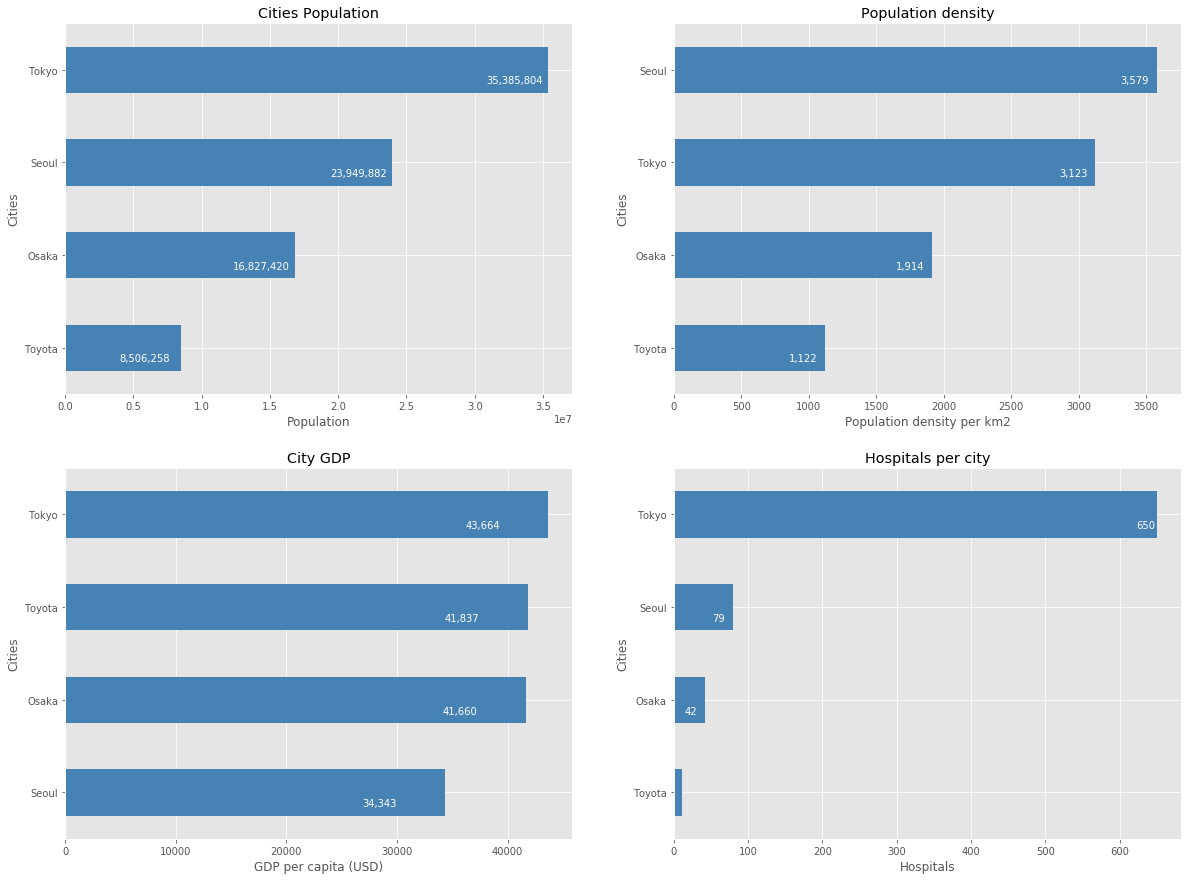

In [82]:
fig = plt.figure()

plt.subplot(2, 2, 1)
df = d1.set_index('Cities')
df1 = df['Population']
df1 = df1.sort_values(ascending=True)
df1.plot(kind='barh', figsize=(20, 15), color='steelblue')
plt.xlabel('Population')
plt.title('Cities Population')

# annotate value labels to each country
for index, value in enumerate(df1): 
    label = format(int(value), ',') # format int with commas
    
    #place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 4500000, index - 0.15), color='white')

plt.subplot(2, 2, 2)
df1 = df['Population density (pop. per km2)']
df1 = df1.sort_values(ascending=True)
df1.plot(kind='barh', figsize=(20, 15), color='steelblue')
plt.xlabel('Population density per km2')
plt.title('Population density')

# annotate value labels to each country
for index, value in enumerate(df1): 
    label = format(int(value), ',') # format int with commas
    
    #place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 270, index - 0.15), color='white')


plt.subplot(2, 2, 3)
df1 = df['GDP per capita (USD)']
df1 = df1.sort_values(ascending=True)
df1.plot(kind='barh', figsize=(20, 15), color='steelblue')
plt.xlabel('GDP per capita (USD)')
plt.title('City GDP')

# annotate value labels to each country
for index, value in enumerate(df1): 
    label = format(int(value), ',') # format int with commas
    
    #place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 7500, index - 0.15), color='white')

plt.subplot(2, 2, 4)
df1 = df['Hospitals/City']
df1 = df1.sort_values(ascending=True)
df1.plot(kind='barh', figsize=(20, 15), color='steelblue')
plt.xlabel('Hospitals')
plt.title('Hospitals per city')

# annotate value labels to each country
for index, value in enumerate(df1): 
    label = format(int(value), ',') # format int with commas
    
    #place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 28, index - 0.15), color='white')

plt.show()

In [83]:
# Cluster 1

d2 = data.loc[data['Cluster'] == 1]
d2.sort_values(by='Cities')

,Country,Hospitals/Country,Hospital beds(per 1000 population),Access to Healthcare(% population),Year,Cities,Population,Population density (pop. per km2),GDP per capita (USD),Hospitals/City,Cluster
7,United States,5564,2.9,99.970,2015,Chicago,9557503,504.8,61519,84,1
9,United States,5564,2.9,99.970,2015,Dallas,7266065,206.7,62286,37,1
10,United States,5564,2.9,99.970,2015,Houston,6759072,229.6,67361,51,1
15,United Kingdom,1882,2.8,99.110,2015,London,11853946,1830.9,58827,134,1
6,United States,5564,2.9,99.970,2015,Los Angeles,17756698,211.7,57577,144,1
19,Spain,765,3.0,99.904,2015,Madrid,6548823,830.8,43074,56,1
13,United States,5564,2.9,99.970,2015,Miami,6181765,385.5,47592,28,1
5,United States,5564,2.9,99.970,2015,New York,20194502,845.7,74244,130,1
14,France,3089,6.5,98.650,2015,Paris,12006868,994.0,61883,39,1
12,United States,5564,2.9,99.970,2015,Philadelphia,6439693,497.5,64023,100,1


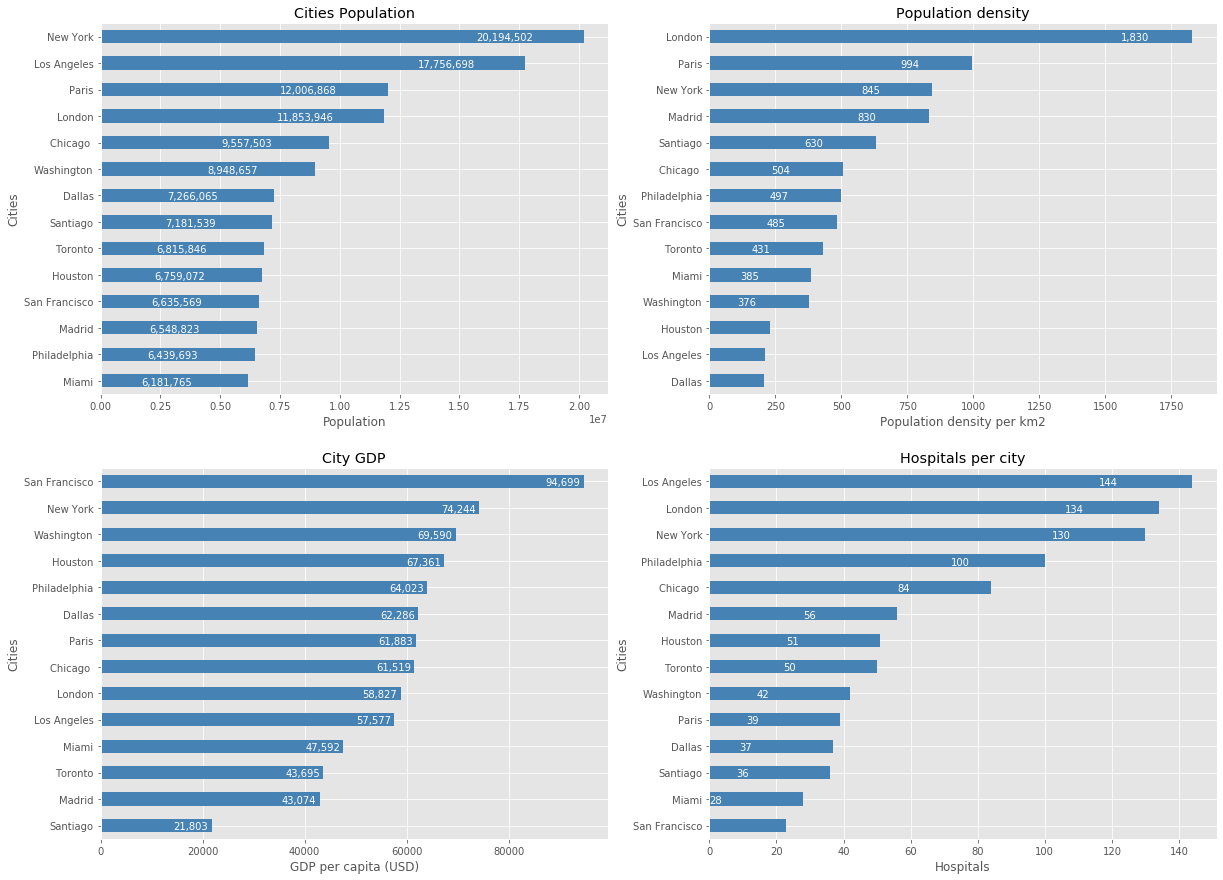

In [84]:
# Bar plots

fig = plt.figure()

plt.subplot(2, 2, 1)
df = d2.set_index('Cities')
df1 = df['Population']
df1 = df1.sort_values(ascending=True)
df1.plot(kind='barh', figsize=(20, 15), color='steelblue')
plt.xlabel('Population')
plt.title('Cities Population')

# annotate value labels to each country
for index, value in enumerate(df1): 
    label = format(int(value), ',') # format int with commas
    
    #place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 4500000, index - 0.15), color='white')

plt.subplot(2, 2, 2)
df1 = df['Population density (pop. per km2)']
df1 = df1.sort_values(ascending=True)
df1.plot(kind='barh', figsize=(20, 15), color='steelblue')
plt.xlabel('Population density per km2')
plt.title('Population density')

# annotate value labels to each country
for index, value in enumerate(df1): 
    label = format(int(value), ',') # format int with commas
    
    #place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 270, index - 0.15), color='white')


plt.subplot(2, 2, 3)
df1 = df['GDP per capita (USD)']
df1 = df1.sort_values(ascending=True)
df1.plot(kind='barh', figsize=(20, 15), color='steelblue')
plt.xlabel('GDP per capita (USD)')
plt.title('City GDP')

# annotate value labels to each country
for index, value in enumerate(df1): 
    label = format(int(value), ',') # format int with commas
    
    #place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 7500, index - 0.15), color='white')

plt.subplot(2, 2, 4)
df1 = df['Hospitals/City']
df1 = df1.sort_values(ascending=True)
df1.plot(kind='barh', figsize=(20, 15), color='steelblue')
plt.xlabel('Hospitals')
plt.title('Hospitals per city')

# annotate value labels to each country
for index, value in enumerate(df1): 
    label = format(int(value), ',') # format int with commas
    
    #place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 28, index - 0.15), color='white')

plt.show()

In [85]:
# Cluster 2

d3 = data.loc[data['Cluster'] == 2]
d3

,Country,Hospitals/Country,Hospital beds(per 1000 population),Access to Healthcare(% population),Year,Cities,Population,Population density (pop. per km2),GDP per capita (USD),Hospitals/City,Cluster
4,Mexico,4456,1.5,91.183,2015,Mexico City,20553996,4455.5,22587,66,2
16,Colombia,340,1.5,89.625,2015,Bogota,8952756,3377.2,22189,22,2


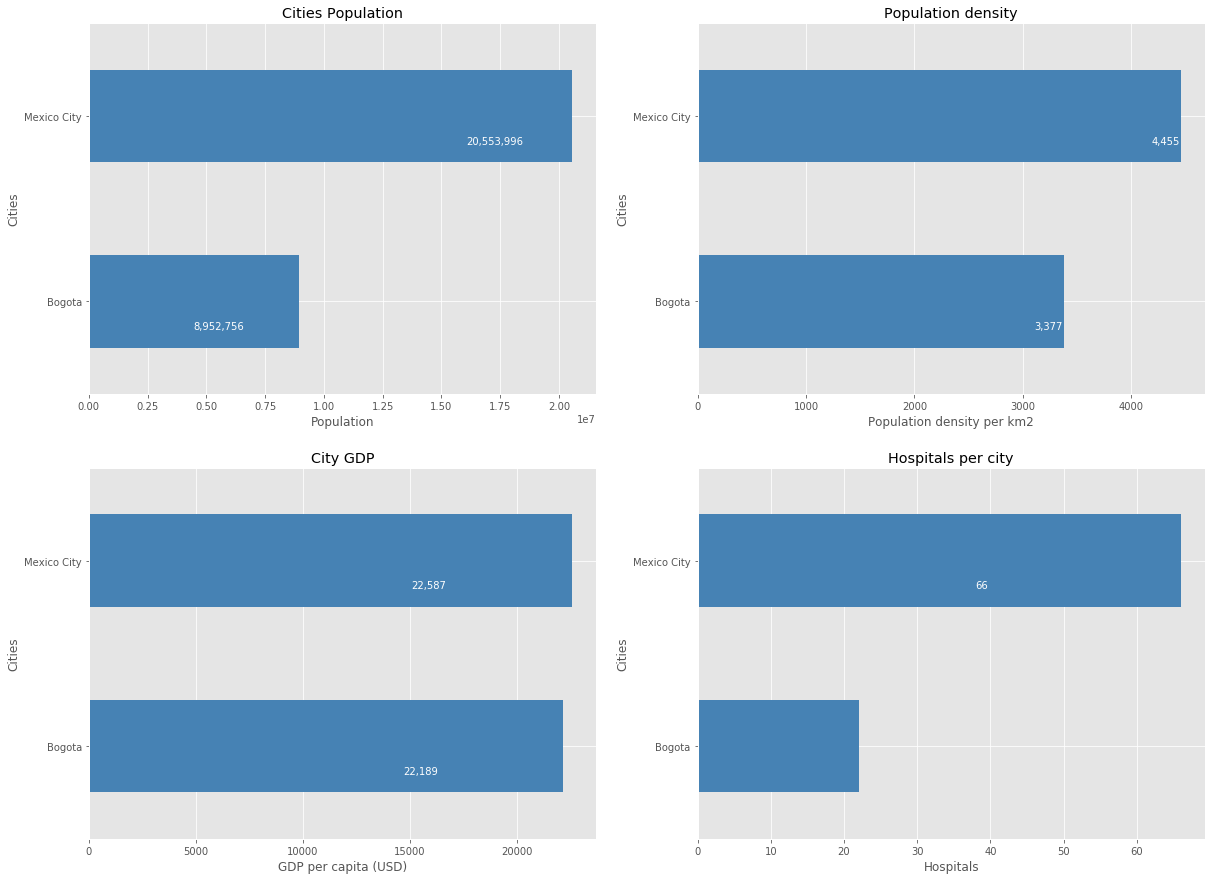

In [86]:
# Bar plots

fig = plt.figure()

plt.subplot(2, 2, 1)
df = d3.set_index('Cities')
df1 = df['Population']
df1 = df1.sort_values(ascending=True)
df1.plot(kind='barh', figsize=(20, 15), color='steelblue')
plt.xlabel('Population')
plt.title('Cities Population')

# annotate value labels to each country
for index, value in enumerate(df1): 
    label = format(int(value), ',') # format int with commas
    
    #place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 4500000, index - 0.15), color='white')

plt.subplot(2, 2, 2)
df1 = df['Population density (pop. per km2)']
df1 = df1.sort_values(ascending=True)
df1.plot(kind='barh', figsize=(20, 15), color='steelblue')
plt.xlabel('Population density per km2')
plt.title('Population density')

# annotate value labels to each country
for index, value in enumerate(df1): 
    label = format(int(value), ',') # format int with commas
    
    #place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 270, index - 0.15), color='white')


plt.subplot(2, 2, 3)
df1 = df['GDP per capita (USD)']
df1 = df1.sort_values(ascending=True)
df1.plot(kind='barh', figsize=(20, 15), color='steelblue')
plt.xlabel('GDP per capita (USD)')
plt.title('City GDP')

# annotate value labels to each country
for index, value in enumerate(df1): 
    label = format(int(value), ',') # format int with commas
    
    #place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 7500, index - 0.15), color='white')

plt.subplot(2, 2, 4)
df1 = df['Hospitals/City']
df1 = df1.sort_values(ascending=True)
df1.plot(kind='barh', figsize=(20, 15), color='steelblue')
plt.xlabel('Hospitals')
plt.title('Hospitals per city')

# annotate value labels to each country
for index, value in enumerate(df1): 
    label = format(int(value), ',') # format int with commas
    
    #place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 28, index - 0.15), color='white')

plt.show()

After this analysis, I think there is no surprise. The features represent the quality of life in each city; we can observe a clear segmentation into regions. There is one cluster that represents the so-called "west" that includes west Europe and North America, another cluster that represents Latin America except for Santiago de Chile, and finally, a third cluster that represents East Asia.


In conclusion, we can say we need more data. What we can say using the result obtained with this data is that it is a regional problem, so we need to study the features of each region and see what benefits and disadvantages have each one. Then, do a local analysis of each city to explore the local healthcare system.